# Test pour l'importation des batiments INRIA dans le framework MASK RCNN 

Extrait du site internet :
- Coverage of 810 km² (405 km² for training and 405 km² for testing)
- Aerial orthorectified color imagery with a spatial resolution of 0.3 m
- Ground truth data for two semantic classes: building and not building (publicly disclosed only for the training subset)

1 px = 0.3 x 0.3 = 0.09 m2


In [14]:
import cv2
import os 
from tqdm import tqdm
from matplotlib import pyplot as plt

In [8]:
folder_path = r'C:\Users\VArri\Documents\Rooftop\dataset\dataset\dataset\train\gt'
file_list = os.listdir(folder_path)
print(file_list[0:10])

['austin1.tif', 'austin10.tif', 'austin11.tif', 'austin12.tif', 'austin13.tif', 'austin14.tif', 'austin15.tif', 'austin16.tif', 'austin17.tif', 'austin18.tif']


In [13]:
im = cv2.imread(os.path.join(folder_path,file_list[0]))
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

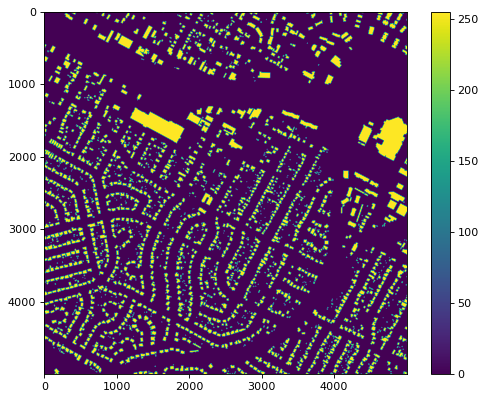

In [17]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(imgray)
plt.colorbar()

In [41]:
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print('length of contours = {}'.format(len(contours)))

length of contours = 2412


In [46]:
import numpy as np
blank_image = np.zeros((5000,5000,3), np.uint8)
result = cv2.drawContours(blank_image, contours[0:10], -1, (0,255,0), 3)

In [47]:
cv2.imwrite('test.jpg', result)

True

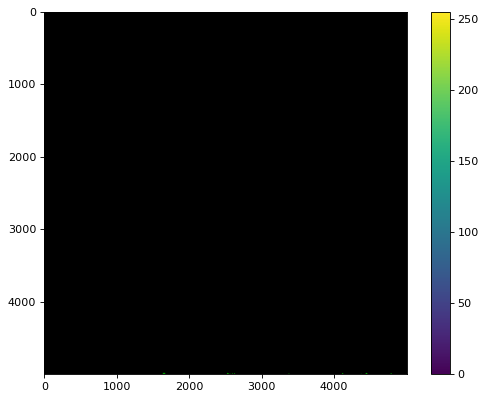

In [48]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(result)
plt.colorbar()

## Suppression des batiments trop petits 

Minimum 20 m2 pour les batiments

Nombre de superficie de batiments supérieur à 10 m2 = 1604


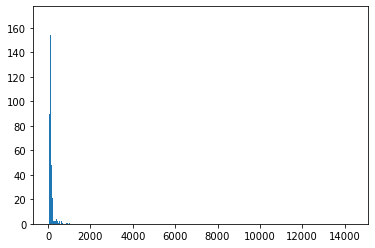

In [78]:
areas=[]
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])*0.09
    if area > 20:
        #print(area)
        areas.append(area)
#plt.hist(areas,  bins=np.logspace(start=np.log10(10), stop=np.log10(15), num=10))
plt.hist(areas,  bins='auto')
print('Nombre de superficie de batiments supérieur à 10 m2 = {}'.format(len(areas)))

In [79]:
print(contours[0])

[[[4368 4995]]

 [[4368 4996]]

 [[4370 4996]]

 [[4369 4996]]]
